In [19]:
import cv2
import numpy as np

#img = cv2.imread("simpsons.jpg") #coloured format
img = cv2.imread("images/original/img1.jpg")
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #gray scale image
h1,w1 = gray_img.shape
final_img = img

#template = cv2.imread("barts_face.jpg",cv2.IMREAD_GRAYSCALE)
template = cv2.imread("images/template/test.jpg",cv2.IMREAD_GRAYSCALE)
w,h = template.shape[::-1] #rows = height,columns = width

result = cv2.matchTemplate(gray_img,template,cv2.TM_CCOEFF_NORMED)
loc = np.where(result >= 0.55)

for pt in zip(*loc[::-1]):
    global coordinates
    coordinates = pt
    cv2.rectangle(final_img,pt,(pt[0]+w,pt[1]+h),(0,255,0),3)

crop_width_size = 3
crop_height_size = 3
height = int(h1 / crop_height_size)
width = int(w1 / crop_width_size )

correct_rect = False
rect_number = 0
for ih in range(crop_height_size):
    for iw in range(crop_width_size):
        x = int(w1/crop_width_size * iw) 
        y = int(h1/crop_height_size * ih)

        cv2.rectangle(final_img,(x,y),(x+width,y+height),(0,0,255),1)
        if((coordinates[0] >= x and coordinates[0] <= (x+width)) and (coordinates[1] >= y and coordinates[1] <= (y+height))):
            if(((coordinates[0]+int(w/2)) >= x and (coordinates[0]+int(w/2)) <= (x+width)) and ((coordinates[1]+h) >= y and (coordinates[1]+h) <= (y+height))):
                correct_rect = True
                rect_number = iw+1
        else:
            if(((coordinates[0]+int(w/2)) >= x and (coordinates[0]+int(w/2)) <= (x+width)) and ((coordinates[1]+h) >= y and (coordinates[1]+h) <= (y+height))):
                correct_rect = True
                rect_number = iw+1

print(coordinates)
if(correct_rect == True):
    print(rect_number)
cv2.namedWindow("Final_Image",cv2.WINDOW_NORMAL)
#cv2.imshow("Image",img)
cv2.imshow("Final_Image",final_img)
cv2.namedWindow("Result",cv2.WINDOW_NORMAL)
cv2.imshow("Result",result)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1966, 1151)
2


## Update Version

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
%matplotlib inline

Original Image Dimensions: (2304, 3456, 3)


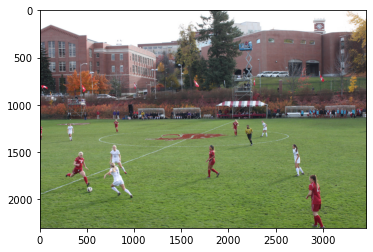

In [21]:
#reading the original image

img = cv2.imread("images/original/img1.jpg")
print("Original Image Dimensions:",img.shape)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)

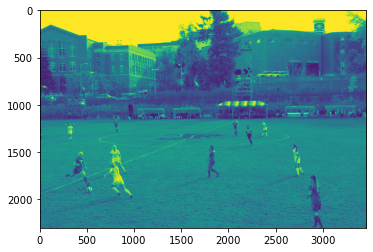

In [22]:
#converting to original image into grayscale image
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

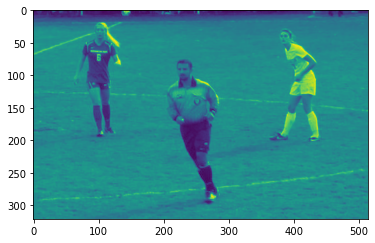

In [23]:
#reading the tenmplate to be matched converting it to gray and displaying it

template1 = cv2.imread("images/template/test.jpg",0)
plt.imshow(template1)

In [24]:
img_gray = cv2.bilateralFilter(img_gray,11,17,17)
template1 = cv2.bilateralFilter(template1,11,17,17)

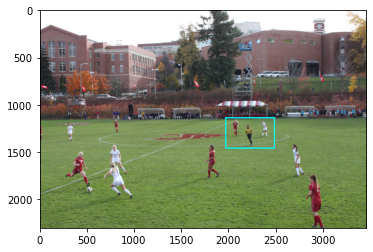

In [26]:
#loop over the scales of the images
for scale in np.linspace(0.2,1.0,20)[::-1]:
    #resize the image according to the scale,and keep track
    #of the ratio of the resizing
    resized = imutils.resize(template1,width=int(template1.shape[1]*scale))
    for angle in np.arange(0,360,15):
        rotated = imutils.rotate(resized,angle)
        w,h = rotated.shape[::-1]
        
        #Perform match operations
        res = cv2.matchTemplate(img_gray,rotated,cv2.TM_CCOEFF_NORMED)
        
        #specify a threshold
        threshold = 0.8
        
        #strore the coordinates of matched area in a numpy array
        loc = np.where(res >= threshold)
        
        if loc:
            for pt in zip(*loc[::-1]):
                cv2.rectangle(img2,pt,(pt[0]+w,pt[1]+h),(0,255,255),2)
                
plt.imshow(img2)